# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [1]:
import numpy as np

def custom_svd(X, n_iter=100, tol=1e-10):
    """
    Custom SVD function that computes the singular value decomposition of X
    without using numpy's linalg.svd.

    Parameters:
    - X: The input matrix to decompose.
    - n_iter: Number of iterations for convergence.
    - tol: Tolerance for convergence.

    Returns:
    - U: Left singular vectors.
    - S: Singular values.
    - Vt: Right singular vectors transposed.
    """
    # Compute the Gram matrix (X.T * X), which is square and symmetric
    XTX = X.T @ X
    
    # Step 1: Eigenvalue decomposition of XTX to find V and S^2
    eigvals, V = np.linalg.eigh(XTX)  # Eigen decomposition of XTX
    S = np.sqrt(eigvals[::-1])  # Singular values (reverse sort by magnitude)
    V = V[:, ::-1]  # Sort eigenvectors accordingly
    
    # Step 2: Calculate U from X and V
    U = X @ V
    U /= S  # Normalize U to unit vectors
    
    # Ensure U and S match the dimensions required
    return U, S, V.T

def apply_svd_custom(X_train, X_test, n_components):
    """
    Custom SVD transformation on X_train and X_test using reduced n_components.
    
    Parameters:
    - X_train: Training data matrix
    - X_test: Test data matrix
    - n_components: Number of components to keep
    
    Returns:
    - X_train_reduced: Transformed training data
    - X_test_reduced: Transformed test data
    - Vt_reduced: Reduced right singular vectors (transposed)
    """
    # Step 1: Apply custom SVD on the training data
    U, S, Vt = custom_svd(X_train)
    
    # Step 2: Reduce the components to the top `n_components`
    U_reduced = U[:, :n_components]
    S_reduced = S[:n_components]
    Vt_reduced = Vt[:n_components, :]
    
    # Step 3: Project the training data onto the reduced components
    X_train_reduced = np.dot(U_reduced, np.diag(S_reduced))
    
    # Step 4: Project the test data using Vt_reduced
    X_test_reduced = np.dot(X_test, Vt_reduced.T)
    
    return X_train_reduced, X_test_reduced, Vt_reduced


## Part 3: Train Logistic Regression and Measure Performance

In [2]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [12]:
svd_components = [10,20,40,60,80,100,120,150,200,250,300,500]  # Add different numbers of components to explore

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd, Vt_reduced = apply_svd_custom(X_train, X_test, n_components)

    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
        
    # Store results for this experiment
    results.append({
        'n_components': n_components,
        'accuracy': accuracy,
        'training_time': training_time
    })
    
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")



Training models with different levels of SVD preprocessing...
Applying custom SVD with 10 components...
SVD components: 10, Accuracy: 0.8020, Training time: 0.4672 seconds
Applying custom SVD with 20 components...
SVD components: 20, Accuracy: 0.8779, Training time: 0.7111 seconds
Applying custom SVD with 40 components...
SVD components: 40, Accuracy: 0.9024, Training time: 3.0158 seconds
Applying custom SVD with 60 components...
SVD components: 60, Accuracy: 0.9133, Training time: 8.6337 seconds
Applying custom SVD with 80 components...
SVD components: 80, Accuracy: 0.9166, Training time: 19.7104 seconds
Applying custom SVD with 100 components...
SVD components: 100, Accuracy: 0.9181, Training time: 27.6568 seconds
Applying custom SVD with 120 components...
SVD components: 120, Accuracy: 0.9184, Training time: 39.1578 seconds
Applying custom SVD with 150 components...
SVD components: 150, Accuracy: 0.9198, Training time: 45.4319 seconds
Applying custom SVD with 200 components...
SVD c

## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


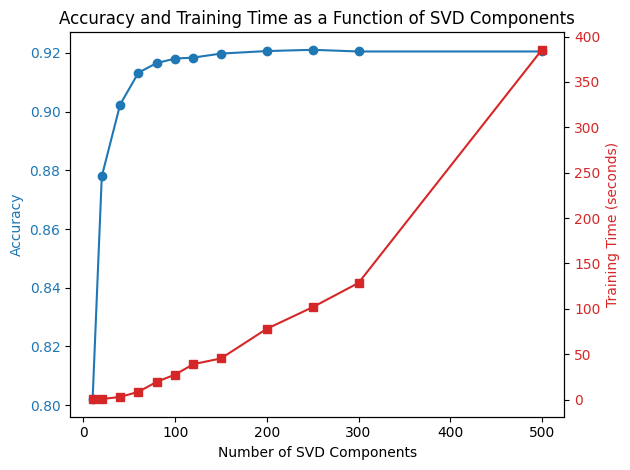

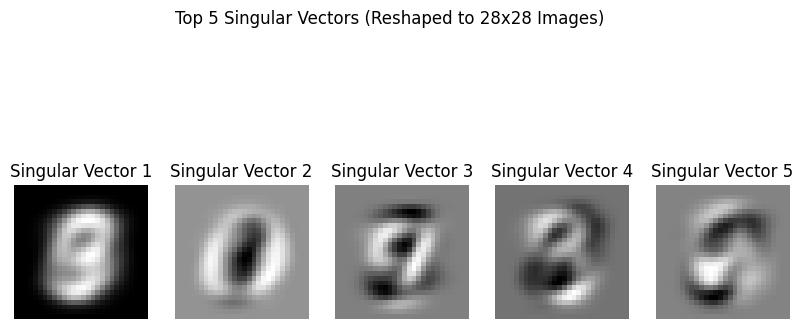

In [14]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization
# Import necessary libraries for plotting
import matplotlib.pyplot as plt

# Extract data from results
n_components = [result['n_components'] for result in results]
accuracies = [result['accuracy'] for result in results]
training_times = [result['training_time'] for result in results]

# Create a figure with two y-axes to plot accuracy and training time on the same graph
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Number of SVD Components')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(n_components, accuracies, color=color, marker='o', label='Accuracy')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis to plot training time
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Training Time (seconds)', color=color)
ax2.plot(n_components, training_times, color=color, marker='s', label='Training Time')
ax2.tick_params(axis='y', labelcolor=color)

# Add titles and labels
plt.title('Accuracy and Training Time as a Function of SVD Components')
fig.tight_layout()
plt.show()


def plot_top_singular_vectors(Vt, num_vectors=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_vectors):
        # Reshape the singular vector into a 28x28 image
        singular_vector_image = Vt[i].reshape(28, 28)
        
        # Create a subplot for each singular vector
        plt.subplot(1, num_vectors, i + 1)
        plt.imshow(singular_vector_image, cmap='gray')
        plt.title(f"Singular Vector {i+1}")
        plt.axis('off')
    
    plt.suptitle('Top 5 Singular Vectors (Reshaped to 28x28 Images)')
    plt.show()

# Call the function to plot the top 5 singular vectors
plot_top_singular_vectors(Vt_reduced, num_vectors=5)


## Part 6: Analyze / Conclusion 

YOUR ANSWER: 

The accuracy start with 0.8020 with 10 components, and gradually increases to 0.9211 with 250 components, and later was slightly reduced to 0.9205 with 300 and 500 components. Looks like 0.9211 is the highest accuracy we can get so far.

However, the time it takes to run 250 components is 100% more than running 150 components, while the accuracy gain is minimal (0.0013). The efficient number of components should be around 150-200, or even lower. The overall training time vs number of SVD components is almost linear (without the last datapoint of 500 components), while the training with 500 components used much more time compared to the others, with the last data point added, it shows a somewhat exponential relationship.

Visualizing the singular vectors, the first two singular vector looks the best, while the first looks like the number "9" and the second looks like the number "0", the third looks somewhat a "9", and the fourth looks like somewhat a "3", the last one is really hard to identify the content, the best guess could be "5".